In [9]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import torch
import math
import networkx as nx
from tqdm import tqdm
from PIL import Image
from crp.image import imgify, vis_opaque_img, plot_grid

In [10]:
from expbasics.nmf import sample_cavs, nmf, nearest_neighbors, vis_nearest_neighbors, load_cavs
from expbasics.helper import get_attributions, get_model_etc, get_attribution_cavs

%reload_ext autoreload
%autoreload 2

In [62]:
BIAS = 0.96
BATCH_SIZE = 128
N_BASIS = 4
BATCH_STEP_SIZE = 128
NUM_NEIGHBORS = 36
model, gm, crp_attribution, unbiased_ds = get_model_etc(BIAS)


In [63]:
layer_name = "linear_layers.1"
# sample_cavs(model, unbiased_ds, layer_name, 1, BATCH_STEP_SIZE, 128)
cavs, idx = load_cavs(layer_name, 1, BATCH_STEP_SIZE)
H = nmf(cavs, N_BASIS)

print(H.shape)

nn_idx = nearest_neighbors(H, cavs, idx, NUM_NEIGHBORS, "cosine")  # , "cosine"
for i in range(N_BASIS):
    vis_nearest_neighbors(unbiased_ds, nn_idx[i], f"{layer_name}_cosine_{i}")

(4, 6)


/home/lilli/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  warnings.warn(


In [83]:
t = torch.zeros((4, NUM_NEIGHBORS, 64, 64))
for i in range(N_BASIS):
    for index in range(NUM_NEIGHBORS):
        h = crp_attribution.heatmap(nn_idx[i][index])
        t[i][index] = h
        
def show_neighbors(hms, index):
    return imgify(hms[index], grid=(math.floor(math.sqrt(NUM_NEIGHBORS)),math.floor(math.sqrt(NUM_NEIGHBORS))))

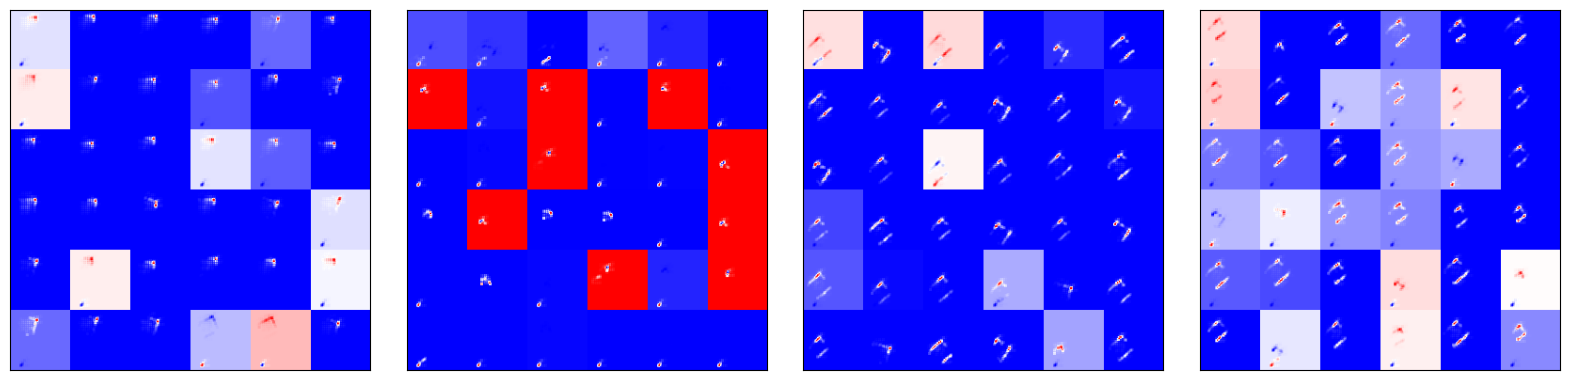

In [84]:
f, ax = plt.subplots(1,N_BASIS, figsize=(20, 12), gridspec_kw={"wspace": 0.1, "hspace": 0})
for n in range(N_BASIS):
    ax[n].xaxis.set_visible(False)
    ax[n].yaxis.set_visible(False)
    ax[n].imshow(show_neighbors(t,n))

In [48]:
H,  [np.intersect1d(nn_idx[x], nn_idx[y]).shape if x != y else "same" for x in range(4) for y in range(4)]


(array([[ 0.        ,  0.        , 11.75612329,  8.71191297, 22.50457525,
          0.        ],
        [ 0.        ,  0.        ,  0.02257934,  0.        ,  0.02345084,
         12.35677329],
        [ 0.        ,  0.        ,  3.80525514,  2.85483271,  4.24792524,
          0.        ],
        [ 0.        ,  0.        ,  4.30456958,  2.68263138,  5.69847257,
          0.        ]]),
 ['same',
  (0,),
  (0,),
  (0,),
  (0,),
  'same',
  (0,),
  (0,),
  (0,),
  (0,),
  'same',
  (0,),
  (0,),
  (0,),
  (0,),
  'same'])

In [1]:
L1  https://transformer-circuits.pub/2023/monosemantic-features

TCAV -> 

multipliziere activations in latent space mit basisvektoren 
https://arxiv.org/abs/2303.12641

SyntaxError: invalid syntax (911830306.py, line 1)